# Enrolments Data

## Exploration
### Statistical exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-06-27T1636.csv")

In [3]:
enrolments.describe()

,Startdate,Enddate,Price,LclPrice,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled,EnrolDate,CanceledDate,InvoiceAmountLcl,LeadID,OppCreatedDate,SpeedtoLead,InstanceID
count,3.754600e+04,3.754600e+04,37546.000000,37546.000000,34315.000000,37546.000000,37546.000000,3.754600e+04,6.657000e+03,37546.000000,37546.000000,3.754600e+04,12643.000000,37546.000000
mean,2.015843e+07,2.016008e+07,6756.567277,6756.567277,24.470377,6.018218,47.380120,2.015767e+07,2.015859e+07,6542.522266,325193.736829,2.015662e+07,6.032633,19871.689954
std,8.479473e+03,7.995770e+03,7603.795313,7603.795313,32.811433,18.828199,80.427007,8.548846e+03,8.001790e+03,7018.317132,180553.605247,8.267848e+03,63.992772,8684.875378
min,2.012111e+07,2.013032e+07,750.000000,750.000000,-694.000000,0.000000,-16.000000,2.013012e+07,2.013071e+07,0.000000,30.000000,2.013012e+07,0.000000,209.000000
25%,2.015083e+07,2.015111e+07,3500.000000,3500.000000,6.000000,0.000000,8.000000,2.015073e+07,2.015091e+07,3500.000000,176235.500000,2.015063e+07,0.000000,12896.000000
50%,2.016041e+07,2.016062e+07,3950.000000,3950.000000,19.000000,0.000000,20.000000,2.016031e+07,2.016042e+07,3950.000000,321556.000000,2.016013e+07,0.600000,19126.000000
75%,2.016112e+07,2.017021e+07,9500.000000,9500.000000,39.000000,7.000000,49.000000,2.016103e+07,2.016111e+07,9500.000000,465454.250000,2.016091e+07,2.710000,27636.000000
max,2.017113e+07,2.018022e+07,130000.000000,130000.000000,270.000000,700.000000,1027.000000,2.017063e+07,2.017063e+07,130000.000000,681190.000000,2.017063e+07,2695.100000,39039.000000


In [4]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type', 'LclPrice',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'CanceledDate', 'Email', 'ExpectedPayment',
       'InvoiceAmountLcl', 'ApplicationType', 'PardotCategory', 'Status',
       'Email.1', 'LeadID', 'OppCreatedDate', 'OppOwnerMetro', 'OppOwnerEmail',
       'PhoneValid', 'SpeedtoLead', 'CampaignSource', 'CampaignSourceCategory',
       'InstanceID'],
      dtype='object')

In [5]:
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)

In [6]:
enrolments['Cancelled'] = enrolments.CanceledDate.isnull()
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type', 'LclPrice',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'CanceledDate', 'Email', 'ExpectedPayment',
       'InvoiceAmountLcl', 'ApplicationType', 'PardotCategory', 'Email.1',
       'LeadID', 'OppCreatedDate', 'OppOwnerMetro', 'OppOwnerEmail',
       'PhoneValid', 'SpeedtoLead', 'InstanceID', 'Cancelled'],
      dtype='object')

### Visualisation

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
% matplotlib inline

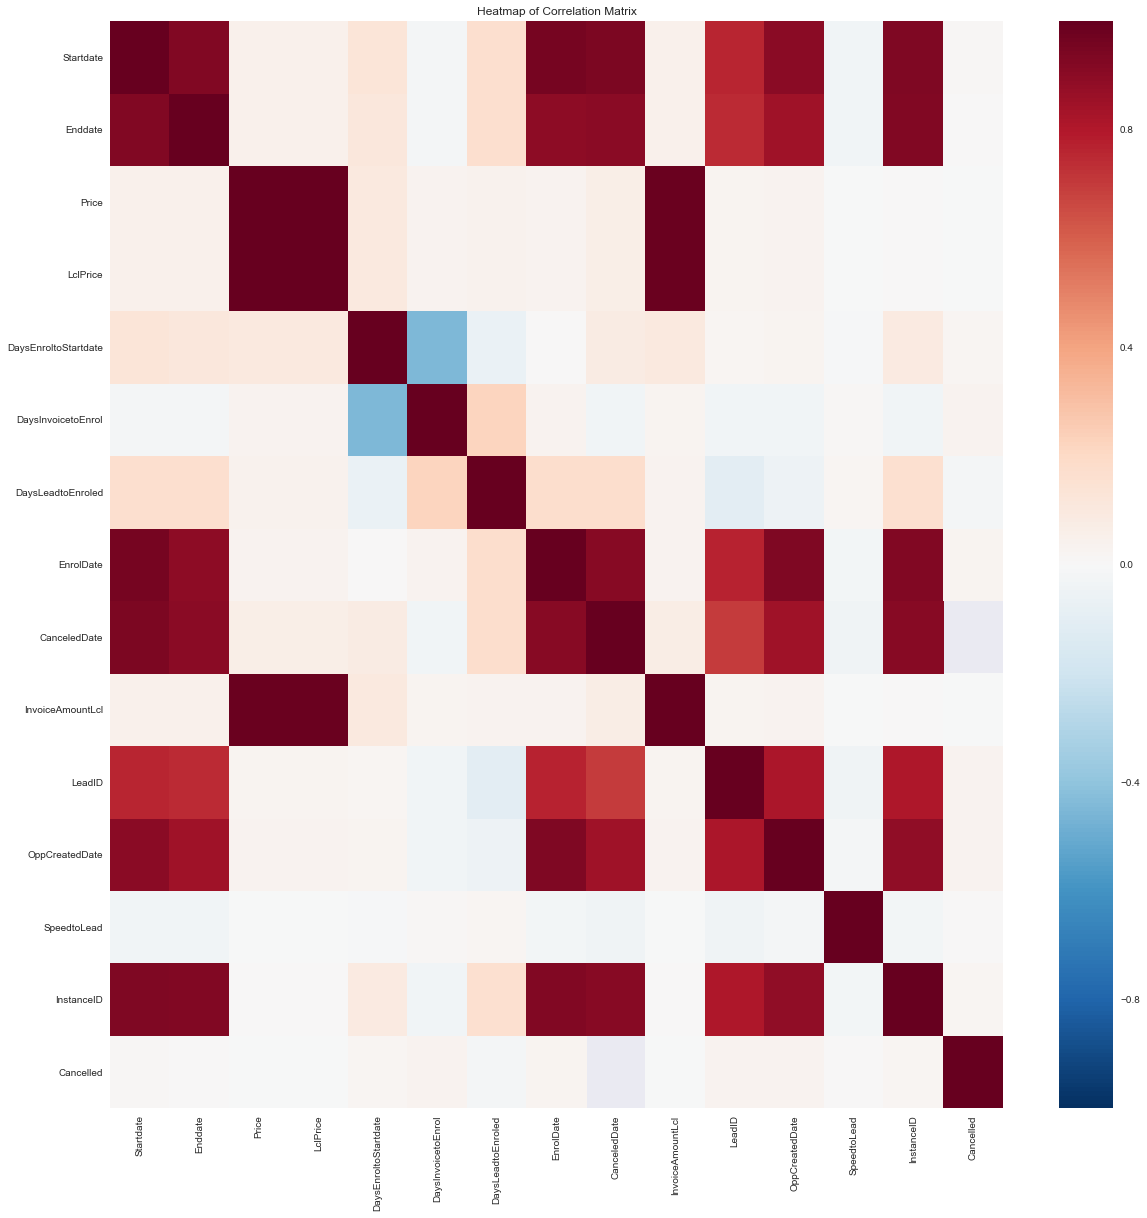

In [8]:
import seaborn as sns
corr = enrolments.corr()
corr = (corr)
corr_cancelled = pd.DataFrame(corr['Cancelled'].drop('Cancelled'))
corr_cancelled.sort_values(by = 'Cancelled', ascending = False)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

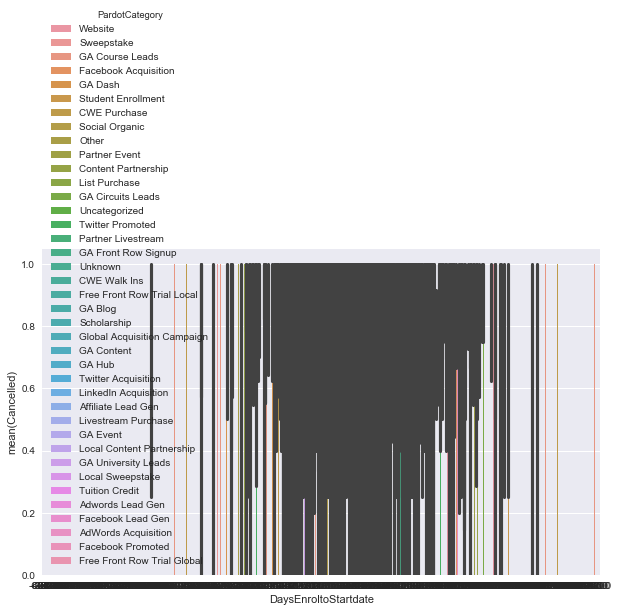

In [9]:
plt.figure(figsize = (10,6))
sns.barplot(x='DaysEnroltoStartdate', y = 'Cancelled', hue = 'PardotCategory', data = enrolments)

### Tree Subset

In [10]:
treesubset = enrolments[['Startdate', 'Enddate','Price','LclPrice','EnrolDate','DaysEnroltoStartdate','DaysInvoicetoEnrol','DaysLeadtoEnroled','Cancelled']]
treesubset.head()

,Startdate,Enddate,Price,LclPrice,EnrolDate,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled,Cancelled
0,20171127,20180209,9000,9000,20170605,175.0,7,89,True
1,20171127,20180223,8000,8000,20170621,159.0,0,37,True
2,20171127,20180223,13950,13950,20170402,239.0,7,27,True
3,20171127,20180223,8000,8000,20170509,202.0,0,25,True
4,20171127,20180223,13950,13950,20170615,165.0,0,56,True


In [11]:
treesubset['DaysEnroltoStartdate'].fillna(value=0,inplace=True)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
treesubset.describe()
treesubset.isnull().sum()

Startdate               0
Enddate                 0
Price                   0
LclPrice                0
EnrolDate               0
DaysEnroltoStartdate    0
DaysInvoicetoEnrol      0
DaysLeadtoEnroled       0
Cancelled               0
dtype: int64

In [13]:
treesubset.Cancelled.value_counts()

True     30889
False     6657
Name: Cancelled, dtype: int64

In [14]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

cancelled = treesubset['Cancelled']
del treesubset['Cancelled']
treesubset

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Startdate,Enddate,Price,LclPrice,EnrolDate,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled
0,20171127,20180209,9000,9000,20170605,175.0,7,89
1,20171127,20180223,8000,8000,20170621,159.0,0,37
2,20171127,20180223,13950,13950,20170402,239.0,7,27
3,20171127,20180223,8000,8000,20170509,202.0,0,25
4,20171127,20180223,13950,13950,20170615,165.0,0,56
5,20171127,20180223,8000,8000,20170610,170.0,0,36
6,20171127,20180223,13950,13950,20170511,200.0,0,9
7,20171127,20180223,8000,8000,20170512,199.0,0,19
8,20171120,20180223,17500,17500,20170527,176.0,0,299
9,20171030,20180112,13950,13950,20170515,168.0,7,299


In [15]:
X_train, X_test, y_train, y_test = train_test_split(treesubset, cancelled, random_state=1)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
# Fit the decision tree classifier
ctree.fit(X_train, y_train)
# Create a feature vector
features = treesubset.columns.tolist()
features

['Startdate',
 'Enddate',
 'Price',
 'LclPrice',
 'EnrolDate',
 'DaysEnroltoStartdate',
 'DaysInvoicetoEnrol',
 'DaysLeadtoEnroled']

In [16]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

#### Previously exported: 
<img src="decisiontree-enrolments.png">